In [3]:
import pandas as pd 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib as jb
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("output/processed_data/data_scaled.csv")
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361,rice
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058,rice
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066,rice
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048,rice
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373,rice


In [5]:
X = data.drop(["label","rainfall","humidity"], axis=1)
y = data["label"]

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,train_size=0.7)

In [9]:
0.7*2200

1540.0

In [7]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
score

0.9272727272727272

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import xgboost as xgb
import catboost as cb
import numpy as np

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit label encoder and return encoded labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define the models
models = {
    "RandomForest": RandomForestClassifier(),
    "LightGBM": lgb.LGBMClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "CatBoost": cb.CatBoostClassifier(verbose=0),
    "LinearRegression": LinearRegression(),
    "MLP": MLPClassifier()
}

# Dictionary to store scores
scores = {}

# Train and evaluate each model
for name, model in models.items():
    if name == "LinearRegression":
        # For Linear Regression, convert to discrete values for classification
        model.fit(X_train, y_train_encoded)
        y_pred = model.predict(X_test)
        y_pred_discrete = np.rint(y_pred)  # Round predictions to nearest integer
        score = accuracy_score(y_test_encoded, y_pred_discrete)
    else:
        model.fit(X_train, y_train_encoded)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test_encoded, y_pred)
    
    scores[name] = score
    print(f"{name} accuracy: {score:.4f}")


RandomForest accuracy: 0.9955
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1328
[LightGBM] [Info] Number of data points in the train set: 1540, number of used features: 7
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training fr

/home/godson/devtools/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


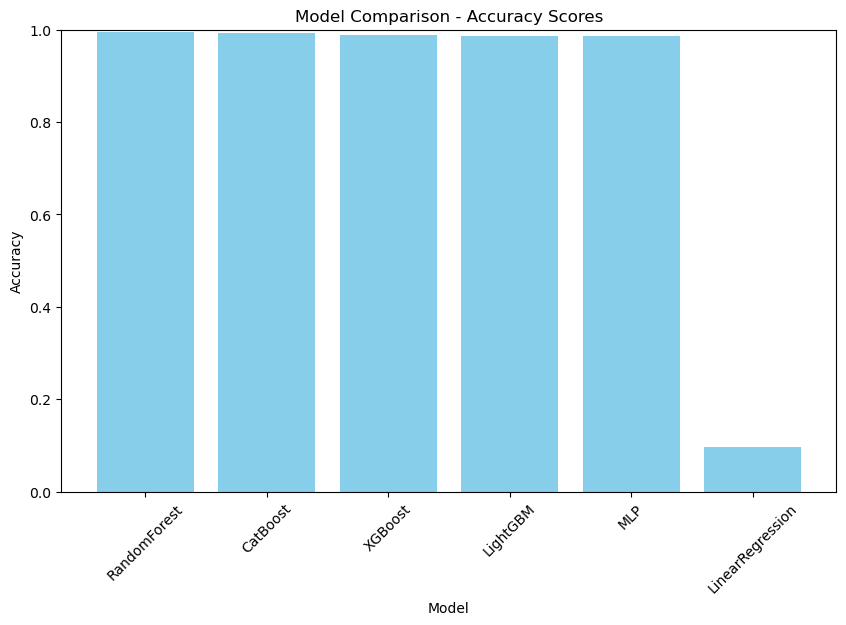

In [13]:
scores_sorted = dict(sorted(scores.items(), key=lambda item: item[1], reverse=True))

# Names of the models
models = list(scores_sorted.keys())
# Corresponding scores
accuracy = list(scores_sorted.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy Scores')
plt.ylim([0, 1])  # Setting the y-axis limit to make the graph more readable
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.show()

In [10]:
from sklearn.metrics import confusion_matrix

# Assuming y_pred has been obtained through model.predict(X_test)
y_pred = model.predict(X_test)

# Now generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# To print the confusion matrix
print(cm)

[[30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

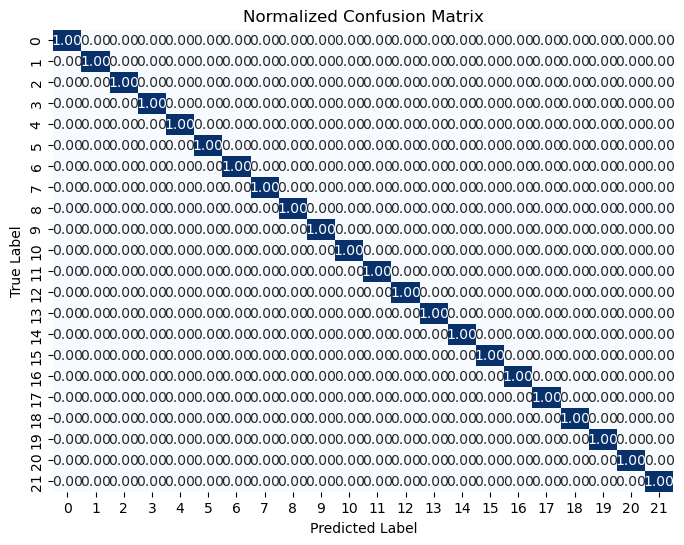

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming y_pred has been obtained through model.predict(X_test)
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix by row (i.e., by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plotting
plt.figure(figsize=(8,6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues', cbar=False)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming y_pred has been obtained through model.predict(X_test)
y_pred = model.predict(X_test)

# Now generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# To print the confusion matrix
print(cm)

In [6]:
scores = cross_val_score(model, X, y, cv=5)
scores

array([0.99772727, 0.99318182, 0.99545455, 0.99772727, 0.98863636])

In [10]:
model.fit(X,y)
jb.dump(model,"output/model/modelv2.joblib")

['output/model/modelv2.joblib']

Feature importance ranking:
1. rainfall: 0.22800305555524542
2. humidity: 0.21259576322296236
3. K: 0.17134701342728206
4. P: 0.1501171575013055
5. N: 0.10626851707725934
6. temperature: 0.07444141257965851
7. ph: 0.057227080636286634


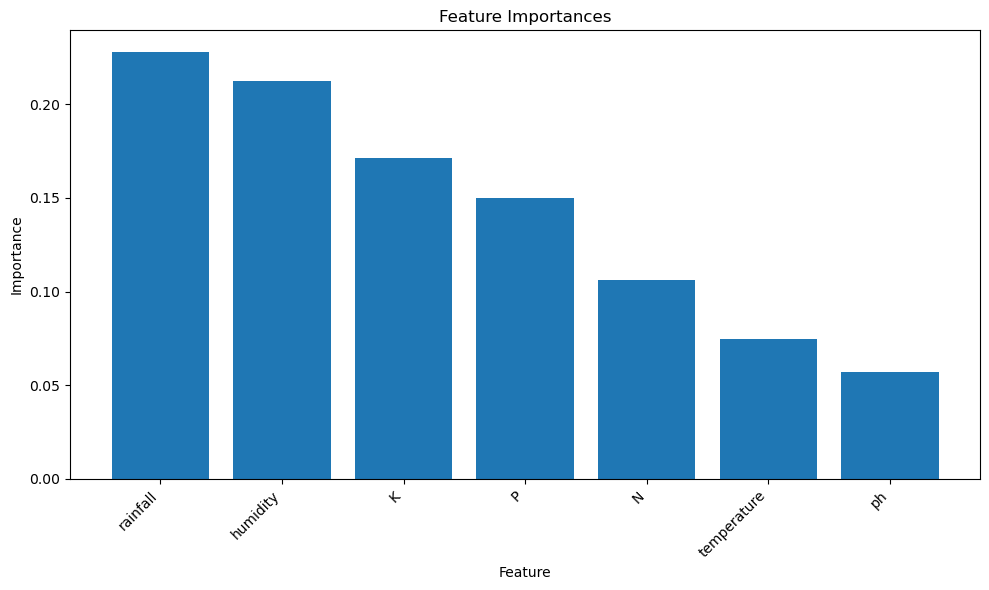

In [8]:
importances = model.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]
feature_names = X.columns
# Print feature importance ranking
print("Feature importance ranking:")
for i, idx in enumerate(sorted_indices):
    print(f"{i+1}. {feature_names[idx]}: {importances[idx]}")

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), np.array(feature_names)[sorted_indices], rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

kmeans = KMeans(n_clusters=len(data["label"].unique()),random_state=0)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_



In [18]:
data["cluster"] = labels

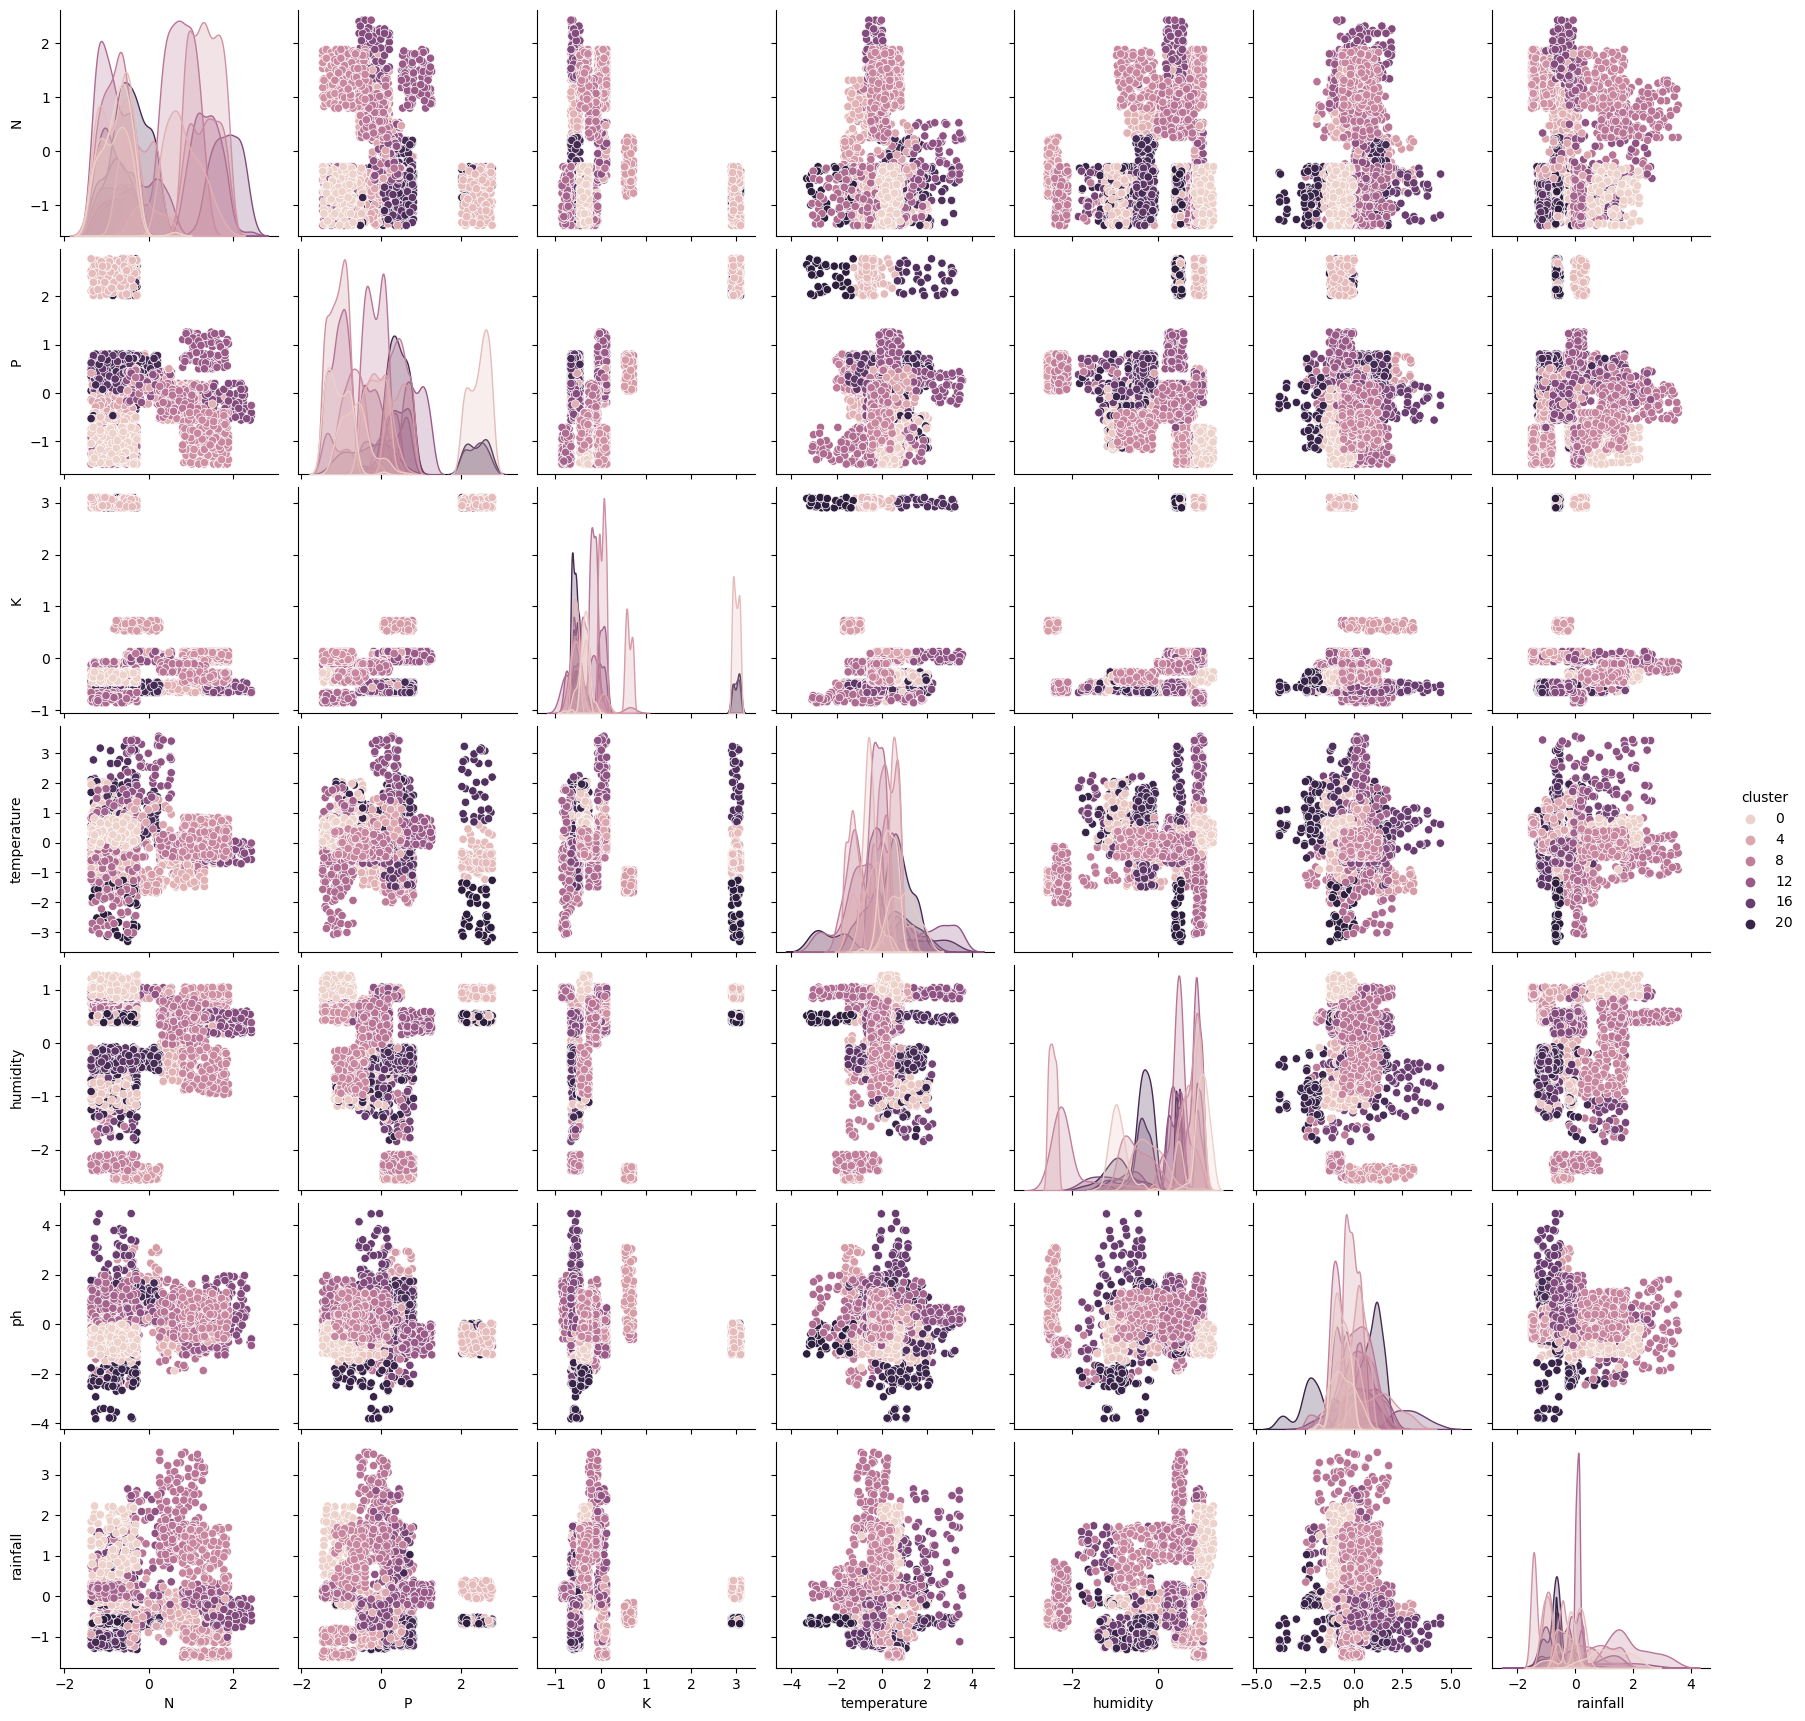

In [20]:
sns.pairplot(data,hue="cluster")
plt.savefig(f"output/plots/cluster.png")
plt.show()

In [21]:
pip freeze > temp.txt

Note: you may need to restart the kernel to use updated packages.
